In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#load Dataset and classify as features and label
phishingData = pd.read_csv('phishing.txt')
phishingData.head()

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
X = phishingData.iloc[:,:-1].values
y = phishingData.iloc[:,30].values

In [8]:
#split features and label into training ang testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [9]:
#perform feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.fit_transform (X_test) 

In [10]:
#Logistic Regression Classifier 
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(C=100,random_state=0)
LRclassifier.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0)

In [11]:
LRpredict = LRclassifier.predict(X_test)

In [12]:
#LRC training score
LRclassifier.score(X_train,y_train)

0.9298177588212485

In [13]:
#LRC test score
LRclassifier.score(X_test,y_test)

0.9267410310521556

In [14]:
#confusion matrix for printing count of misclassified samples in the test data prediction
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,LRpredict)

In [16]:
# classify as features(Prefix_Suffix and URL_of_Anchor) and label with index 5
X = phishingData.iloc[0:5,[6,14]].values
y = phishingData.iloc[0:5,30].values

In [19]:
#split features and label into training ang testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [20]:
#perform feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.fit_transform (X_test) 

In [21]:
#Logistic Regression Classifier 
from sklearn.linear_model import LogisticRegression
LRclassifier1 = LogisticRegression(C=100,random_state=0)
LRclassifier1.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0)

In [22]:
LRpredict1 = LRclassifier1.predict(X_test)

In [23]:
#LRC training score
LRclassifier1.score(X_train,y_train)

1.0

In [24]:
#LRC test score
LRclassifier1.score(X_test,y_test)

1.0

In [25]:
#confusion matrix for printing count of misclassified samples in the test data prediction
from sklearn.metrics import confusion_matrix
LRconfusionMatrix1 = confusion_matrix(y_test,LRpredict1)

In [26]:
#visualize the Test set
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRclassifier1.predict_proba(grid)[:, 1].reshape(xx.shape)

In [27]:
print(probs)

[[1.69212931e-11 1.70416335e-11 1.71628297e-11 ... 1.98095309e-08
  1.99504118e-08 2.00922946e-08]
 [1.75868947e-11 1.77119688e-11 1.78379323e-11 ... 2.05887418e-08
  2.07351643e-08 2.08826281e-08]
 [1.82786780e-11 1.84086718e-11 1.85395901e-11 ... 2.13986032e-08
  2.15507852e-08 2.17040495e-08]
 ...
 [9.99998835e-01 9.99998844e-01 9.99998852e-01 ... 9.99999999e-01
  9.99999999e-01 9.99999999e-01]
 [9.99998879e-01 9.99998887e-01 9.99998895e-01 ... 9.99999999e-01
  9.99999999e-01 9.99999999e-01]
 [9.99998922e-01 9.99998929e-01 9.99998937e-01 ... 9.99999999e-01
  9.99999999e-01 9.99999999e-01]]


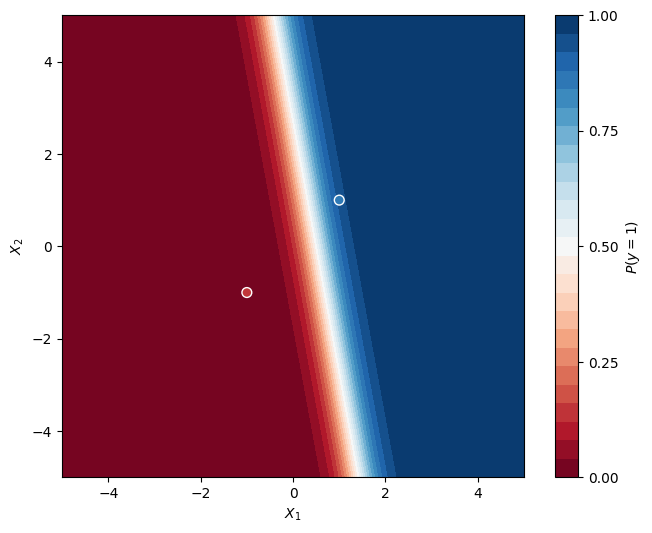

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [29]:
# classify as features(Prefix_Suffix and URL_of_Anchor) and label with index 13
X = phishingData.iloc[0:13,[6,14]].values
y = phishingData.iloc[0:13,30].values

In [31]:
#split features and label into training ang testing data
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)


In [32]:
#perform feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform (X_train)
X_test = scalar.transform (X_test)

In [33]:
#Logistic Regression Classifier 
from sklearn.linear_model import LogisticRegression
LRclassifier11 = LogisticRegression(C=100,random_state=0)
LRclassifier11.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0)

In [34]:
LRpredict11 = LRclassifier11.predict(X_test)

In [35]:
#LRC training score
LRclassifier11.score(X_train,y_train)

0.8888888888888888

In [36]:
#LRC test score
LRclassifier11.score(X_test,y_test)

1.0

In [37]:
#confusion matrix for printing count of misclassified samples in the test data prediction
from sklearn.metrics import confusion_matrix
LRconfusionMatrix11 = confusion_matrix(y_test,LRpredict11)

In [38]:
#visualize the Test set 
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRclassifier11.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

[[4.35180374e-07 4.39590919e-07 4.44046165e-07 ... 1.00132212e-02
  1.01136787e-02 1.02151336e-02]
 [4.41905577e-07 4.46384282e-07 4.50908379e-07 ... 1.01663907e-02
  1.02683689e-02 1.03713594e-02]
 [4.48734711e-07 4.53282629e-07 4.57876640e-07 ... 1.03218788e-02
  1.04254003e-02 1.05299489e-02]
 ...
 [6.55234823e-01 6.57509234e-01 6.59776432e-01 ... 9.99977362e-01
  9.99977589e-01 9.99977814e-01]
 [6.58690882e-01 6.60954291e-01 6.63210365e-01 ... 9.99977706e-01
  9.99977930e-01 9.99978151e-01]
 [6.62130161e-01 6.64382383e-01 6.66627151e-01 ... 9.99978046e-01
  9.99978266e-01 9.99978484e-01]]


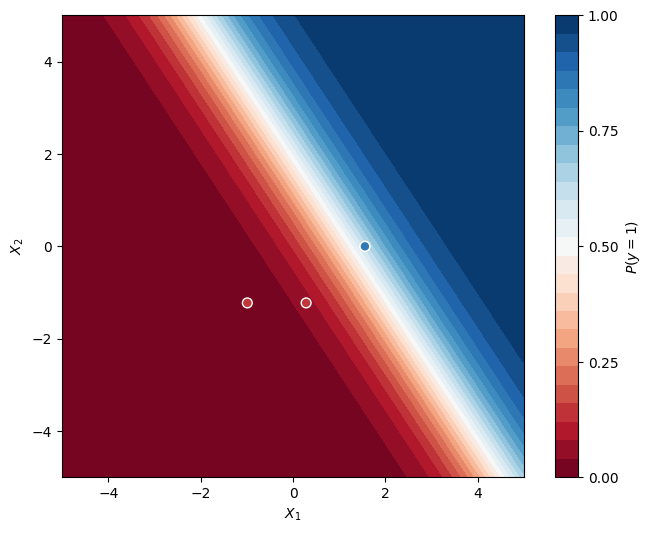

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()